# Anexo B: Algoritmos para resolver sistemas de ecuaciones lineales implementados en Python

## Paquetes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Métodos

Implementación del método de Jacobi.

In [2]:
def JacPy(A,b,x0,e,itermax):
    
    #A:= Matriz de coeficientes
    #b:= vector de constantes
    #x0:= inicialización
    #e:= presicion
    #itermax:= iteración maxima
    
    #Iteración
    it = 1
    
    #Matriz diagonal
    D = np.diag(np.diag(A))
    
    #Inversa de la matriz diagonal
    Dinv = np.linalg.inv(D)
    
    #Matriz triangular superior
    U = np.triu(A, k=1)
    
    #Matriz triangular inferior
    L = np.tril(A, k=-1)
    
    #Iterando la solucion
    x = Dinv.dot(b - (L+U).dot(x0))
    
    #Calculando el residuo
    r = A.dot(x)- b
    
    #Normas de los residuos
    normresJAC = [np.linalg.norm(r,1)]
    
    #Repetir hasta el maximo numero de 
    #iteraciones o alcanzar la precision
    while ((normresJAC[it-1] > e) and (it <= itermax)):  
        
        #Iterando la solucion
        x = Dinv.dot(b - (L+U).dot(x))
    
        #Calculando la diferencia
        r = A.dot(x)- b
        
        #Normas de los residuos
        normresJAC = np.concatenate((normresJAC,
                                     np.linalg.norm(r,1)),
                                    axis = None)
        
        #Aumentando la iteracion
        it = it + 1
        
    return x, normresJAC

Implementación de método de Sobre Relajación Sucesiva.

In [3]:
def SRSPy(A,b,x0,w,e,itermax):
    
    #A:= Matriz
    #b:= vector
    #w:= ponderador
    #e:= presicion
    #itermax:= iteración máxima
    #x0:= inicialización
    
    #Iteración
    it = 1
    
    #Matriz diagonal
    D = np.diag(np.diag(A))
    
    #Matriz triangular superior
    U = np.triu(A, k=1)
    
    #Matriz triangular inferior
    L = np.tril(A, k=-1)
    
    #alfa es una matriz auxiliar
    alfa = np.linalg.inv(w*L+D)
    
    #gama es un vector auxiliar
    gama = w*np.linalg.inv(D+w*L).dot(b)
    
    #Iterando la solucion
    x = alfa.dot((1-w)*D.dot(x0)-w*U.dot(x0)) + gama
    
    #Calculando el residuo
    r = A.dot(x)-b
    
    #Normas de los residuos
    normresSCS = [np.linalg.norm(r,1)]
    
    #Repetir hasta el maximo numero de 
    #iteraciones o alcanzar la precision
    while ((normresSCS[it-1] > e) and (it <= itermax)): 
        
        #Multiplicando
        x = alfa.dot((1-w)*D.dot(x)-w*U.dot(x)) + gama
    
        #Calculando la diferencia
        r = A.dot(x)-b
        
        #Normas de los residuos
        normresSCS = np.concatenate((normresSCS,
                                     np.linalg.norm(r,1)),
                                    axis = None)
        
        #Aumentando la iteracion
        it = it + 1
        
                 
    return x, normresSCS

Implementación de método de Gauss - Seidel.

In [4]:
def GSPy(A,b,x0,e,itermax):
    
    #A:= Matriz de coeficientes
    #b:= vector de constantes
    #x0:= inicialización
    #e:= presicion
    #itermax:= iteración maxima
    
    #Iteración
    it = 1
    
    #Matriz triangular inferior
    U = np.triu(A, k=1)
    
    #Matriz triangular superior
    L = np.tril(A)
    
    #Iterando la solución
    x = np.linalg.inv(L).dot(b-U.dot(x0));
    
    #Calculando el residuo
    r = b-A.dot(x)
    
    #Respaldando la norma
    normresGS = [np.linalg.norm(r,1)]
    
    #Repetir hasta el maximo numero de 
    #iteraciones o alcanzar la precision
    while ((normresGS[it-1] > e) and (it <= itermax)):
        
        #Iterando la solucion
        x = np.linalg.inv(L).dot(b-U.dot(x));
        
        #Calculando el residuo
        r = b-A.dot(x)
        
        #Normas de los residuos
        normresGS = np.concatenate((normresGS,
                                np.linalg.norm(r,1)),
                               axis = None);
        
        #Aumentando la iteracion
        it = it + 1
    
    return x, normresGS

Implementación de método de gradiente conjugado.

In [5]:
def GCPy(A,b,x0,e):
    
    #A:= Matriz de coeficientes
    #b:= vector de constantes
    #x0:= inicialización
    #e:= presicion    
    
    #Iteración
    it = 1
    
    #numeq := numero de ecuaciones
    numeq = A.shape[1]
    
    #Iterando la solucion
    x = x0;
    
    #Calculando el residuo
    r = b - A.dot(x)
    
    #Vectores auxiliares
    d = r;
    
    #Vector para guardar las convergencias
    normresGC = [np.linalg.norm(r,1)]
    
    #Por cada ecuacion, hacer lo siguiente:
    for k in range(numeq):
       
        #Si la norma del vector es mayor a 
        #la presicion entonces
        if normresGC[it-1] > e:
           
            #a:= constante auxiliar
            a = np.transpose(r).dot(r)[0][0]/np.transpose(d).dot(A.dot(d))[0][0]
            
            #Iterando la solucion
            x = x + a*d
            
            #s:= vector auxiliar
            s = r - a*A.dot(d)
            
            #beta:= constante auxiliar
            beta = np.transpose(s).dot(s)[0][0]/np.transpose(r).dot(r)[0][0]
            
            #d:= vector auxiliar
            d = s + beta*d
            
            #actualizando los residuos
            r = s
            
            #Normas de los residuos
            normresGC = np.concatenate((normresGC,
                                np.linalg.norm(r,1)),
                               axis = None);
            
            it = it + 1

        else:
            
            return  x, normresGC
        
    
    return x, normresGC

## Ejemplo:

#### Matriz de coeficientes (A)

In [6]:
A = np.array([[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.5],
              [-1.0,  3.0, -1.0,  0.0,  0.5,  0.0],
              [ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
              [ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
              [ 0.0,  0.5,  0.0, -1.0,  3.0, -1.0],
              [ 0.5,  0.0,  0.0,  0.0, -1.0,  3.0]])
A

array([[ 3. , -1. ,  0. ,  0. ,  0. ,  0.5],
       [-1. ,  3. , -1. ,  0. ,  0.5,  0. ],
       [ 0. , -1. ,  3. , -1. ,  0. ,  0. ],
       [ 0. ,  0. , -1. ,  3. , -1. ,  0. ],
       [ 0. ,  0.5,  0. , -1. ,  3. , -1. ],
       [ 0.5,  0. ,  0. ,  0. , -1. ,  3. ]])

#### Vector de constantes (b)

In [7]:
b = np.array([[2.5], [1.5], [1], [1], [1.5], [2.5]])
b

array([[2.5],
       [1.5],
       [1. ],
       [1. ],
       [1.5],
       [2.5]])

#### Inicialización de la solución ($x_0$) 

In [8]:
x0 = np.zeros((A.shape[1], 1))
x0

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

#### Error máximo (e)

In [9]:
e = 0.000001

#### Número máximo de iteraciones (itermax)

In [10]:
itermax  = 100

#### Solución

In [11]:
np.linalg.solve(A, b)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### ****** Algoritmo de Jacobi ******

In [12]:
SolJac,histJac = JacPy(A,b,x0,e,itermax)

#### Solución

In [13]:
SolJac

array([[1.        ],
       [0.99999993],
       [0.99999994],
       [0.99999994],
       [0.99999993],
       [1.        ]])

#### Precisión vs Iteraciones

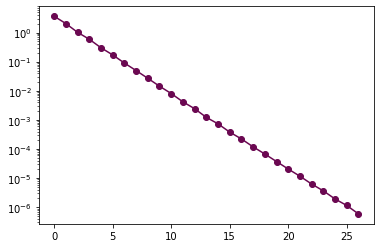

In [14]:
plt.plot(histJac, color="#6b0851", marker='o')
plt.yscale('log')
plt.show()

### ****** Algoritmo de Sobre-Relajación ******

In [15]:
#Peso
w = 1.1;
SolSRS,histSRS = SRSPy(A,b,x0,w,e,itermax);

#### Solución

In [16]:
SolSRS

array([[0.99999997],
       [0.99999992],
       [0.99999991],
       [0.99999995],
       [0.99999999],
       [1.00000001]])

#### Precisión vs Iteraciones

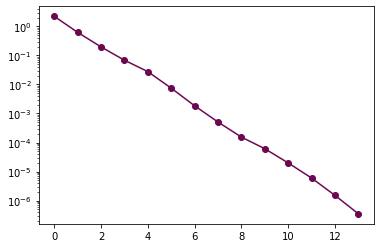

In [17]:
plt.plot(histSRS, color="#6b0851", marker='o')
plt.yscale('log')
plt.show()

### ******** Algoritmo de Gauss - Seidel ********

In [18]:
SolGS,histGS = GSPy(A,b,x0,e,itermax)

#### Solución

In [19]:
SolGS

array([[1.0000001 ],
       [1.00000011],
       [1.00000006],
       [1.00000001],
       [0.99999997],
       [0.99999997]])

#### Precisión vs Iteraciones

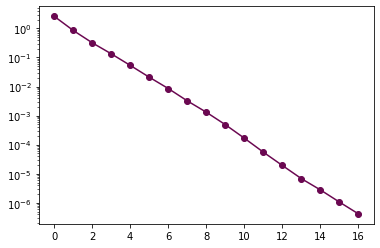

In [20]:
plt.plot(histGS, color="#6b0851", marker='o')
plt.yscale('log')
plt.show()

### ******** Algoritmo del Gradiente Conjugado ********

In [21]:
SolGC,histGC = GCPy(A,b,x0,e)

#### Solución

In [22]:
SolGC

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

#### Precisión vs Iteraciones

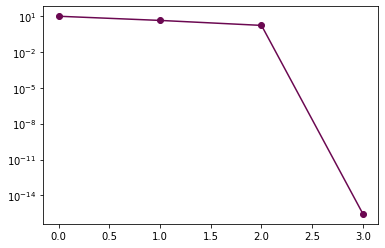

In [23]:
plt.plot(histGC, color="#6b0851", marker='o')
plt.yscale('log')
plt.show()